In [ ]:
!pip3 install seaborn

===データ数の比較===
Original： 22414 個のデータ
Reproduction： 22646 個のデータ
===最小値の比較===
Original: [850.7, 850.8, 851.0, 854.1, 855.0, 855.3, 855.5, 856.2, 856.8, 857.9, 858.9, 863.1, 868.3, 868.6, 870.6, 872.6, 873.1, 874.2, 874.3, 874.5]
Reproduction: [850.5, 850.9, 850.9, 851.7, 851.9, 853.8, 853.9, 854.2, 854.3, 854.6, 855.0, 855.2, 855.3, 856.4, 856.6, 857.1, 858.2, 859.1, 863.2, 864.0]


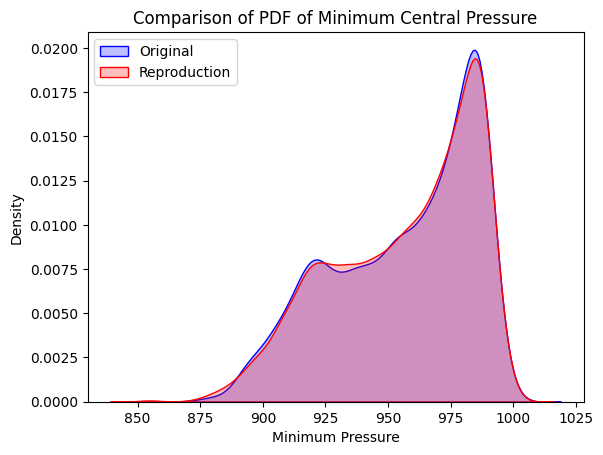

In [9]:
# 著者が提供するSTORMと、著者のコードを使って算出した係数ファイルを使って算出したSTORMの比較

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### STORMファイルをinputとして、いい感じのデータを抽出する関数
def extract_storm_min_pressure(file_path):
    # TXTファイルとしてデータを読み込む
    data = np.loadtxt(file_path, delimiter=',')  # 適切なdelimiterを設定

    # pandasのDataFrameに変換
    columns = ['Year', 'Month', 'TC number', 'Time Step', 'Basin ID', 'Latitude', 'Longitude', 'Minimum pressure', 'Maximum wind speed', 'Radius to maximum winds', 'Category', 'Landfall', 'Distance to land']
    df = pd.DataFrame(data, columns=columns)

    # Year, Month, TC NumberでGroupbyをして、MinimumPressureの列は最小値を取り出す
    min_pressure = df.groupby(['Year', 'Month', 'TC number'])['Minimum pressure'].min()

    return min_pressure

storm_data_origin_1000 = extract_storm_min_pressure('/Users/naoto/STORM-1/STORM_DATA_IBTRACS_WP_1000_YEARS_0_V4.txt')
storm_data_repro = extract_storm_min_pressure('/Users/naoto/STORM-1/STORM_DATA_IBTRACS_WP_100_YEARS_1.txt')

# 1,000年分を結合する
for i in range(2, 11):
    df = extract_storm_min_pressure('/Users/naoto/STORM-1/STORM_DATA_IBTRACS_WP_100_YEARS_{}.txt'.format(i))
    storm_data_repro = pd.concat([storm_data_repro, df], ignore_index=True)

# データ数の確認
print("===データ数の比較===")
print("Original：", len(storm_data_origin_1000), "個のデータ")
print("Reproduction：", len(storm_data_repro), "個のデータ")

# 最小値の確認
print("===最小値の比較===")
sorted_original = sorted(storm_data_origin_1000)
sorted_repro = sorted(storm_data_repro)
print("Original:", sorted_original[:20])
print("Reproduction:", sorted_repro[:20])

# カーネル密度推定を比較する
sns.kdeplot(data=storm_data_origin_1000, label='Original', fill=True, color="blue")
sns.kdeplot(data=storm_data_repro, label='Reproduction', fill=True, color="red")

# グラフの設定
plt.xlabel('Minimum Pressure')
plt.ylabel('Density')
plt.title('Comparison of PDF of Minimum Central Pressure')
plt.legend(loc='upper left')
plt.show()